In [1]:
library(dplyr)
library(tidyverse)
# import data
Cleaned_data <- read.csv("Cleaned_data.csv")

# Select the columns we are interested in 
interested_data <- Cleaned_data %>%
  select(Country.x, iso3c, Deaths...million, Pop..density..per.km2..2021.,GDP.per.capita..current.US.., Obesity.rate...., Percent)

# change some column names so that they are more readable
interested_data <- interested_data %>%
  rename(Country = Country.x, Deaths.per.million = Deaths...million, population.density = Pop..density..per.km2..2021.,
         GDP.per.capita = GDP.per.capita..current.US.., Obesity.rate = Obesity.rate...., Vaccination.rate = Percent)
# note that vaccination rate can be higher than 100% because it calculates all the vacinated residents, domestic and 
# international alike, divided by the domestic population. These are still valid data and should not be altered.

# since most the missing values are in the same row, meaning we are often missing multiple data from the
# same countries, we might as well drop the countries with missing values in them
interested_data <- na.omit(interested_data)

# Export csv file
write.csv(interested_data,"interested_data.csv", row.names=FALSE)

# calculate the Pearson correlations between Deaths.per.million and its possible influencial factors
# this is wrote by ChatGPT

# Specify the column to correlate with (Deaths.per.million in this case)
column_to_correlate <- interested_data$Deaths.per.million

# Columns to correlate with (population.density, GDP.per.capita, Obesity.rate, Vaccination.rate)
columns_to_correlate_with <- interested_data[, c('population.density', 'GDP.per.capita', 'Obesity.rate', 'Vaccination.rate')]

# Calculate Pearson correlations for each pair
correlations <- sapply(columns_to_correlate_with, function(col) cor(column_to_correlate, col))

# Print the results
result_df <- data.frame(
  Variable = names(correlations),
  Pearson_Correlation = correlations
)

print(result_df)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


                             Variable Pearson_Correlation
population.density population.density         -0.07394959
GDP.per.capita         GDP.per.capita          0.23824888
Obesity.rate             Obesity.rate          0.33150596
Vaccination.rate     Vaccination.rate          0.18885243


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


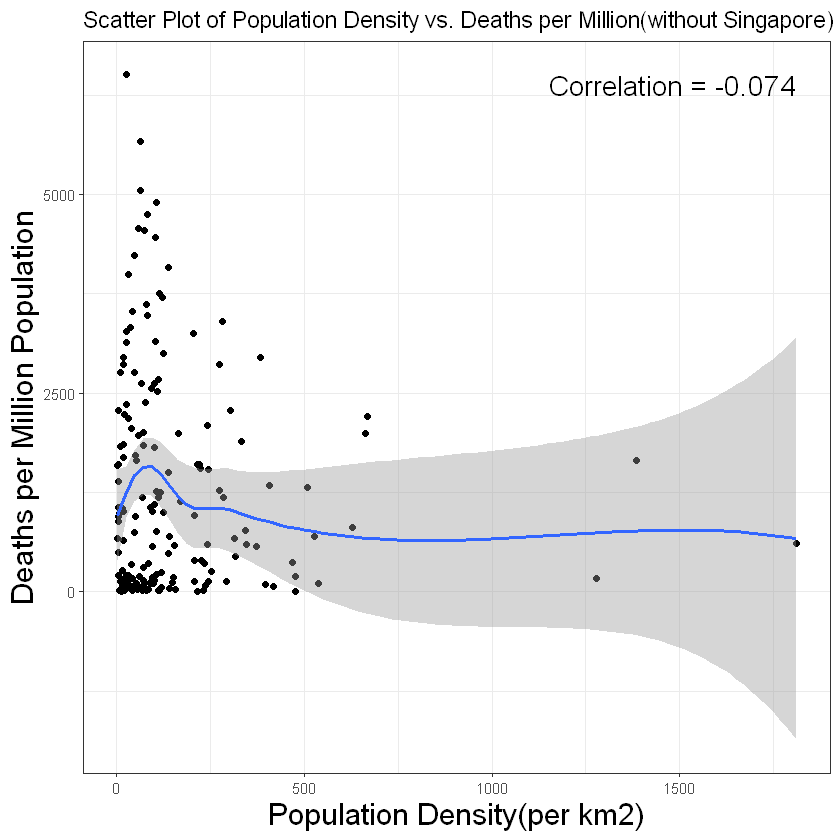

In [5]:
# now let's see if the visualizaton shows the same result 
# first let us remove Singapore whose population density is too high and will mess up the plot if included
SGP_removed <- subset(interested_data, iso3c != "SGP")
# then we can use the data frame to plot
ggplot(SGP_removed, aes(x= population.density, y = Deaths.per.million))+
geom_point() +
annotate("text", x = max(SGP_removed$population.density), y = max(SGP_removed$Deaths.per.million),
           label = "Correlation = -0.074",size = 6, hjust = 1, vjust = 1)+
labs(title = "Scatter Plot of Population Density vs. Deaths per Million(without Singapore)",
     x = "Population Density(per km2)", y = "Deaths per Million Population")+
geom_smooth() +
theme_bw() +
theme(axis.title = element_text(size = 18),plot.title = element_text(size = 14))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


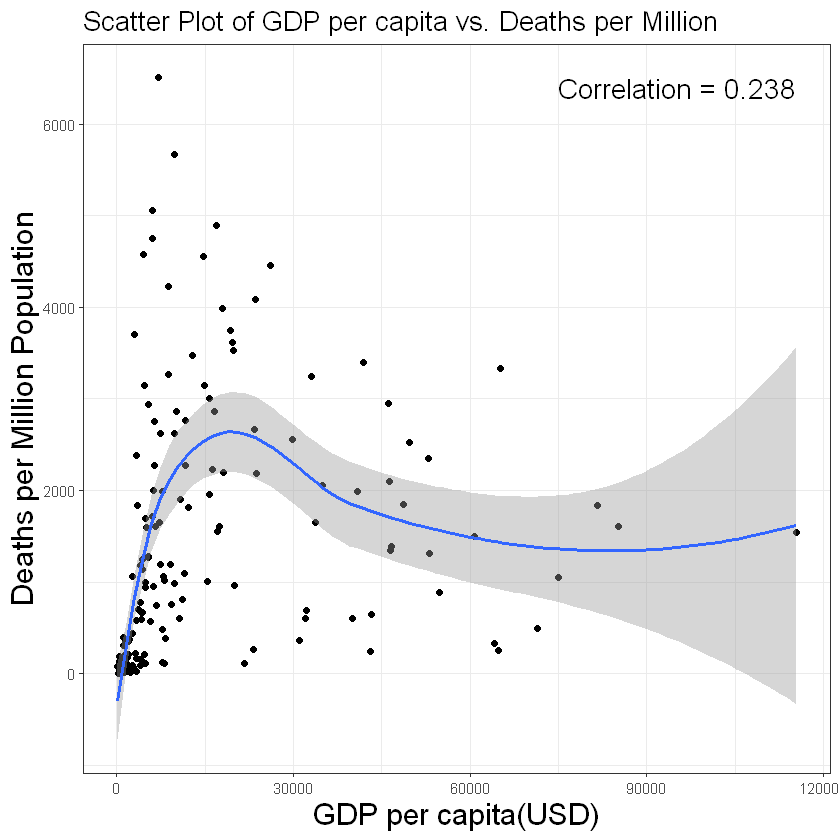

In [6]:
ggplot(interested_data, aes(x = GDP.per.capita, y = Deaths.per.million)) +
  geom_point() +
  annotate("text", x = max(interested_data$GDP.per.capita), y = max(interested_data$Deaths.per.million),
           label = "Correlation = 0.238",size = 6, hjust = 1, vjust = 1) +
  labs(title = "Scatter Plot of GDP per capita vs. Deaths per Million",
      x = "GDP per capita(USD)", y = "Deaths per Million Population") +
  geom_smooth() +
  theme_bw() +
  theme(axis.title = element_text(size = 18),plot.title = element_text(size = 16))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


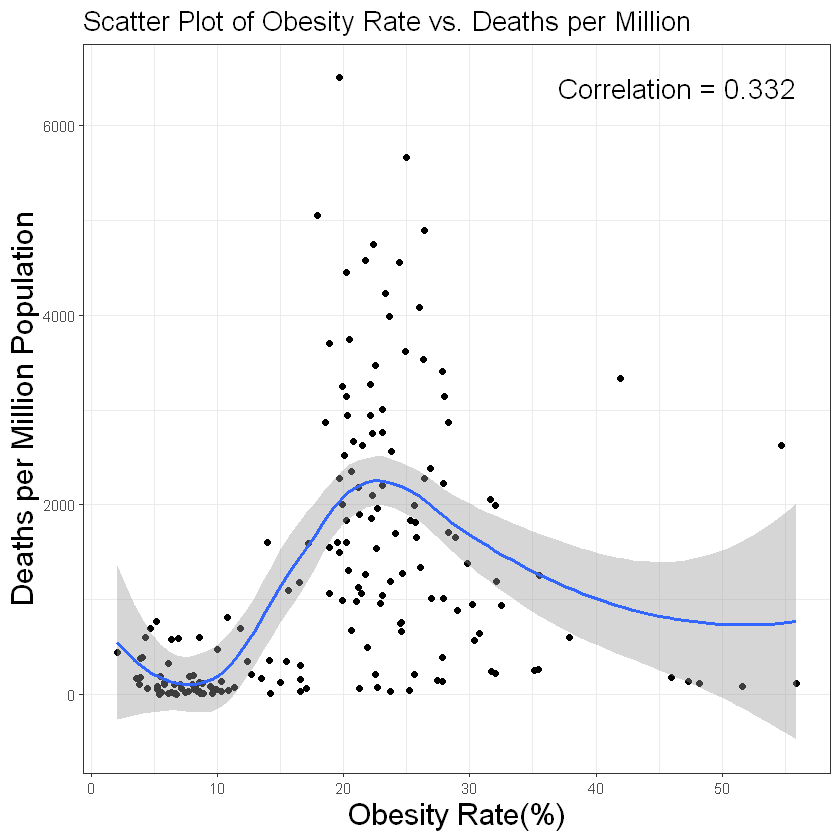

In [7]:
ggplot(interested_data, aes(x = Obesity.rate, y = Deaths.per.million)) +
  geom_point() +
  annotate("text", x = max(interested_data$Obesity.rate), y = max(interested_data$Deaths.per.million),
           label = "Correlation = 0.332", size = 6, hjust = 1, vjust = 1) +
  labs(title = "Scatter Plot of Obesity Rate vs. Deaths per Million",
      x = "Obesity Rate(%)", y = "Deaths per Million Population") +
  geom_smooth() +
  theme_bw() +
  theme(axis.title = element_text(size = 18),plot.title = element_text(size = 16))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


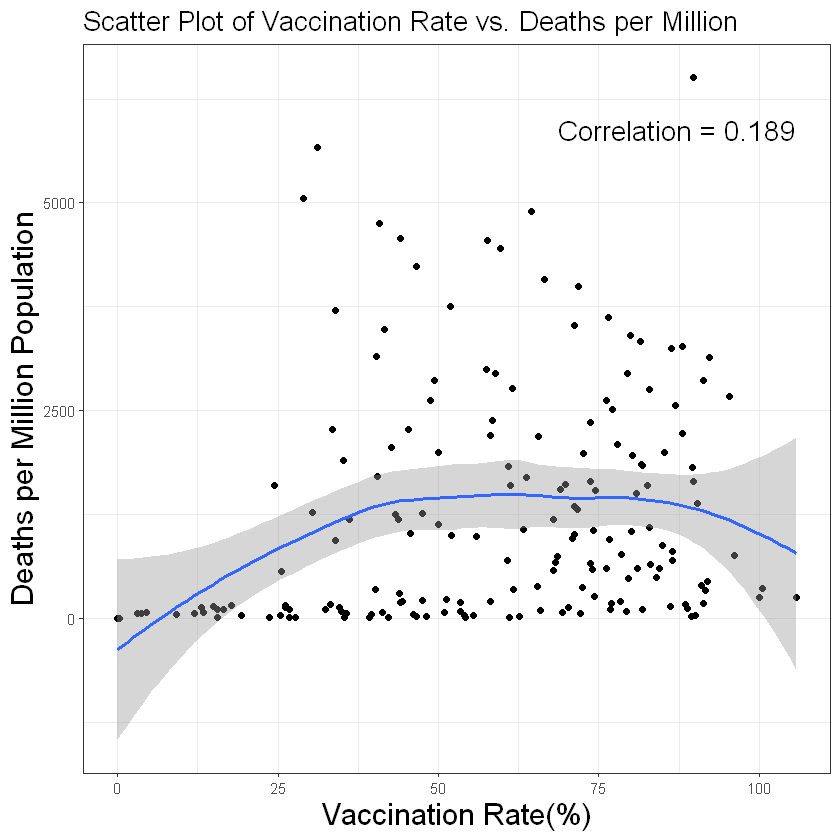

In [8]:
ggplot(interested_data, aes(x = Vaccination.rate, y = Deaths.per.million)) +
  geom_point() +
  annotate("text", x = max(interested_data$Vaccination.rate), y = max(interested_data$Deaths.per.million),
           label = "Correlation = 0.189", size = 6, hjust = 1, vjust = 3) +
  labs(title = "Scatter Plot of Vaccination Rate vs. Deaths per Million",
      x = "Vaccination Rate(%)", y = "Deaths per Million Population") +
  geom_smooth() +
  theme_bw() +
  theme(axis.title = element_text(size = 18),plot.title = element_text(size = 16))